Check mapping for several high SEM perts in jm_sem_pert_summary.ipynb.

In [1]:
import BioSimSpace as BSS

from rdkit import Chem
from rdkit.Chem import AllChem, rdmolops
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

/home/jscheen/miniconda3/envs/sire/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject
  return f(*args, **kwds)


## mobley_1520842~mobley_6988468

In [3]:
# load molecules
liga_name = "mobley_1571523"
ligb_name = "mobley_2763835"

path_to_ligs = "./quintup_ligands/ligand_files/"
path_to_sdf_ligs = "./quintup_ligands/sdffiles/"

mol1 = BSS.IO.readPDB(path_to_ligs+liga_name+".pdb")[0]
mol2 = BSS.IO.readPDB(path_to_ligs+ligb_name+".pdb")[0]

mol1_r = Chem.SDMolSupplier(path_to_ligs+liga_name+".sdf")[0]
mol2_r = Chem.SDMolSupplier(path_to_ligs+ligb_name+".sdf")[0]
AllChem.Compute2DCoords(mol1_r)
AllChem.Compute2DCoords(mol2_r)
Draw.MolsToGridImage([mol1_r, mol2_r])

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpnhx8tu_i/./QUINTUP_LIGANDS/LIGAND_FILES/MOBLEY_1571523.PDB.pdb'

In [75]:
mapping = BSS.Align.matchAtoms(mol1, mol2)

In [76]:
for atom1, atom2 in mapping.items():
    print(mol1.getAtoms()[atom1].name(), "<->", mol2.getAtoms()[atom2].name())

C <-> C
C <-> C
C <-> C
C <-> C
N <-> C
C <-> C
C <-> C
H <-> H
H <-> H
H <-> H
H <-> N
H <-> H
H <-> H
H <-> H


In [77]:
mol1_r = rdmolops.AddHs(mol1_r)
mol2_r = rdmolops.AddHs(mol2_r)
for atom1, atom2 in mapping.items():
    print(mol1_r.GetAtoms()[atom1].GetSymbol(), "<->", mol2_r.GetAtoms()[atom2].GetSymbol())

C <-> C
C <-> C
C <-> C
C <-> C
N <-> C
C <-> C
C <-> C
H <-> H
H <-> H
H <-> H
H <-> N
H <-> H
H <-> H
H <-> H


In [78]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

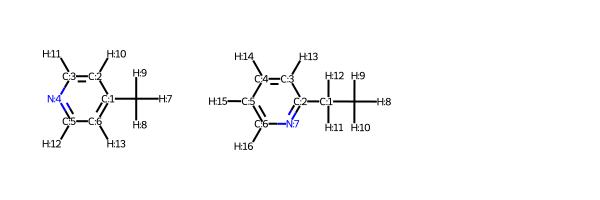

In [79]:
AllChem.Compute2DCoords(mol1_r)
AllChem.Compute2DCoords(mol2_r)

Draw.MolsToGridImage([mol_with_atom_index(mol1_r), mol_with_atom_index(mol2_r)])

In [80]:
mapping

{0: 0,
 1: 1,
 6: 2,
 5: 3,
 4: 4,
 3: 5,
 2: 6,
 10: 16,
 11: 15,
 12: 13,
 13: 7,
 7: 10,
 8: 9,
 9: 8}

In [83]:
mapping = BSS.Align.matchAtoms(mol1, mol2, prematch={0 : 1})
mol1_r = rdmolops.AddHs(mol1_r)
mol2_r = rdmolops.AddHs(mol2_r)
for atom1, atom2 in mapping.items():
    print(mol1_r.GetAtoms()[atom1].GetSymbol(), "<->", mol2_r.GetAtoms()[atom2].GetSymbol())

N <-> C
C <-> C
C <-> N
H <-> H
C <-> C
C <-> C
C <-> C
C <-> C
H <-> H
H <-> H
H <-> C
H <-> H
H <-> H


In [84]:
mapping

{4: 5,
 5: 6,
 6: 7,
 7: 11,
 0: 1,
 1: 2,
 2: 3,
 3: 4,
 12: 16,
 8: 12,
 9: 0,
 10: 13,
 11: 14}

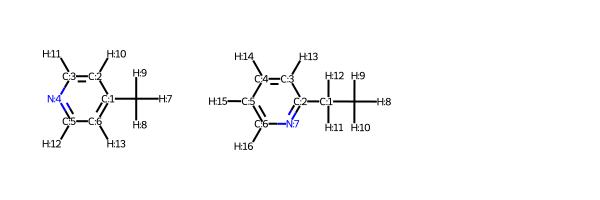

In [85]:
Draw.MolsToGridImage([mol_with_atom_index(mol1_r), mol_with_atom_index(mol2_r)])